# End-to-End Text Classification on Google Play Store Reviews

# 1. Dataset Selection & Loading 
    I selected Google play dataset for users reviews for mobile apps


In [99]:
import pandas as pd
df = pd.read_csv("reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [6]:
import pandas as pd
from collections import Counter

# Load dataset
df = pd.read_csv("reviews.csv")

# Preview
print("Columns in dataset:")
print(df.columns)

# Select only necessary columns
df = df[['content', 'score']].dropna()

# Convert numeric score to sentiment
def label_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df['label'] = df['score'].apply(label_sentiment)

# Show dataset stats
print("Total records:", len(df))
print("\nSamples per class:")
print(df['label'].value_counts())

# Total number of words
all_words = " ".join(df['content'].astype(str)).split()
print("\nTotal words:", len(all_words))

# Top 20 most frequent words
top_words = Counter(all_words).most_common(20)
print("\nTop 20 most frequent words:")
for word, count in top_words:
    print(f"{word}: {count}")


Columns in dataset:
Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId'],
      dtype='object')
Total records: 12495

Samples per class:
label
Positive    5654
Negative    4850
Neutral     1991
Name: count, dtype: int64

Total words: 345808

Top 20 most frequent words:
the: 12005
to: 11744
I: 10157
and: 7229
a: 7096
it: 5921
app: 5051
is: 4845
for: 4788
of: 3713
my: 3545
this: 3306
but: 3245
you: 2692
in: 2689
that: 2586
have: 2515
on: 2362
not: 2347
be: 2093


# Preprocessing

In [13]:
df.head()

,content,score,label
0,I cannot open the app anymore,1,Negative
1,I have been begging for a refund from this app...,1,Negative
2,Very costly for the premium version (approx In...,1,Negative
3,"Used to keep me organized, but all the 2020 UP...",1,Negative
4,Dan Birthday Oct 28,1,Negative


In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Remove URLs, HTML tags, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply cleaning to the 'content' column
df['cleaned_content'] = df['content'].apply(clean_text)

# Verify preprocessing with a sample
print("\nBefore cleaning:", df['content'].iloc[0])
print("After cleaning:", df['cleaned_content'].iloc[0])

# Recalculate word statistics with cleaned data
all_cleaned_words = " ".join(df['cleaned_content']).split()
print("\nTotal words after cleaning:", len(all_cleaned_words))

# Updated top 20 frequent words
top_cleaned_words = Counter(all_cleaned_words).most_common(20)
print("\nTop 20 words after cleaning:")
for word, count in top_cleaned_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Before cleaning: I cannot open the app anymore
After cleaning: cannot open app anymore

Total words after cleaning: 179527

Top 20 words after cleaning:
app: 7572
task: 2617
time: 1815
like: 1729
good: 1727
use: 1604
great: 1485
would: 1328
calendar: 1322
work: 1316
day: 1308
list: 1225
really: 1208
one: 1165
love: 1128
feature: 1106
dont: 1057
version: 1028
get: 998
need: 975


In [21]:
# after cleaning
df.head()

,content,score,label,cleaned_content
0,I cannot open the app anymore,1,Negative,cannot open app anymore
1,I have been begging for a refund from this app...,1,Negative,begging refund app month nobody replying
2,Very costly for the premium version (approx In...,1,Negative,costly premium version approx indian rupee per...
3,"Used to keep me organized, but all the 2020 UP...",1,Negative,used keep organized update made mess thing cud...
4,Dan Birthday Oct 28,1,Negative,dan birthday oct


# Step 3: Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels (Positive: 0, Neutral: 1, Negative: 2)
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])

# Split data into training (80%) and testing (20%)
X = df['cleaned_content']
y = df['encoded_label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Preserve class distribution
)

# Display split statistics
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())

Training samples: 9996
Testing samples: 2499

Class distribution in training set:
encoded_label
2    4523
0    3880
1    1593
Name: count, dtype: int64

Class distribution in testing set:
encoded_label
2    1131
0     970
1     398
Name: count, dtype: int64


# Step 4: Feature Representation


In [27]:
# 4.1 Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_features=5000)  # Limit to top 5000 words
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

print("\nBoW shape (Training):", X_train_bow.shape)
print("BoW shape (Testing):", X_test_bow.shape)


BoW shape (Training): (9996, 5000)
BoW shape (Testing): (2499, 5000)


In [29]:
# 4.2 TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nTF-IDF shape (Training):", X_train_tfidf.shape)
print("TF-IDF shape (Testing):", X_test_tfidf.shape)


TF-IDF shape (Training): (9996, 5000)
TF-IDF shape (Testing): (2499, 5000)


Defaulting to user installation because normal site-packages is not writeable


# Step 5: Classical Machine Learning Models



=== Evaluating Logistic Regression ===

Classification Report (BoW):
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       970
           1       0.33      0.18      0.23       398
           2       0.74      0.87      0.80      1131

    accuracy                           0.70      2499
   macro avg       0.60      0.59      0.59      2499
weighted avg       0.67      0.70      0.68      2499


=== Evaluating Naive Bayes ===

Classification Report (BoW):
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       970
           1       0.30      0.12      0.17       398
           2       0.75      0.87      0.81      1131

    accuracy                           0.72      2499
   macro avg       0.59      0.59      0.58      2499
weighted avg       0.67      0.72      0.68      2499


=== Evaluating SVM ===

Classification Report (BoW):
              precision    recall  f1-score   suppor

Accuracy  Precision    Recall        F1   ROC-AUC
Logistic Regression BoW     0.701481   0.601963  0.590025  0.586621  0.795013
                    TF-IDF  0.720688   0.613528  0.587459  0.567304  0.817897
Naive Bayes         BoW     0.715086   0.594487  0.589215  0.576863  0.772587
                    TF-IDF  0.725090   0.815378  0.573963  0.525325  0.808854
SVM                 BoW     0.678671   0.573663  0.569880  0.565840  0.786244
                    TF-IDF  0.719488   0.618807  0.587264  0.567639  0.806307
Random Forest       BoW     0.710684   0.581985  0.566859  0.526775  0.785531
                    TF-IDF  0.711885   0.630040  0.567298  0.525482  0.798327
KNN                 BoW     0.602241   0.483314  0.479756  0.458705  0.707344
                    TF-IDF  0.493397   0.425337  0.406233  0.395701  0.599616

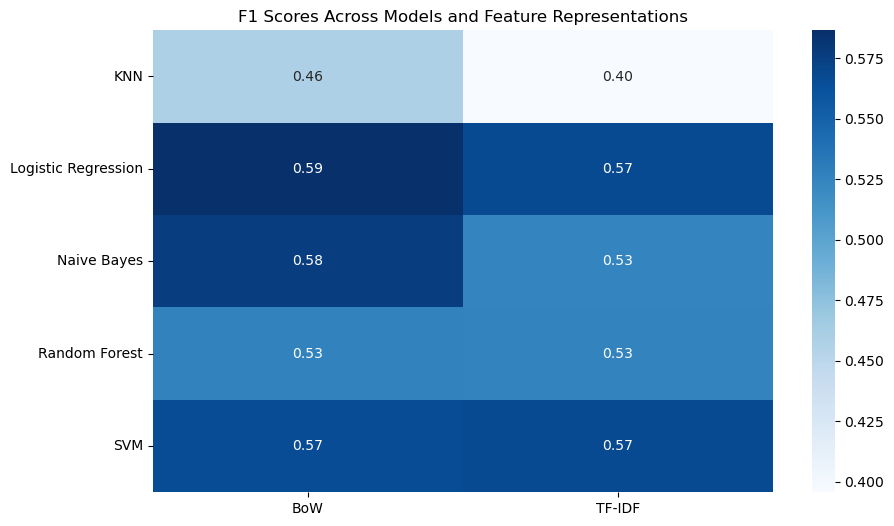

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, classification_report, 
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Evaluate models on BoW and TF-IDF features
results = {}

for model_name, model in models.items():
    print(f"\n=== Evaluating {model_name} ===")
    
    # Train on BoW features
    model.fit(X_train_bow, y_train)
    y_pred_bow = model.predict(X_test_bow)
    
    # Train on TF-IDF features
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_test_tfidf)
    
    # Calculate metrics
    results[model_name] = {
        "BoW": {
            "Accuracy": accuracy_score(y_test, y_pred_bow),
            "Precision": precision_score(y_test, y_pred_bow, average='macro'),
            "Recall": recall_score(y_test, y_pred_bow, average='macro'),
            "F1": f1_score(y_test, y_pred_bow, average='macro'),
            "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test_bow), multi_class='ovr')
        },
        "TF-IDF": {
            "Accuracy": accuracy_score(y_test, y_pred_tfidf),
            "Precision": precision_score(y_test, y_pred_tfidf, average='macro'),
            "Recall": recall_score(y_test, y_pred_tfidf, average='macro'),
            "F1": f1_score(y_test, y_pred_tfidf, average='macro'),
            "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test_tfidf), multi_class='ovr')
        }
    }
    
    # Print classification report for BoW
    print(f"\nClassification Report (BoW):\n{classification_report(y_test, y_pred_bow)}")

# Convert results to DataFrame for visualization
results_df = pd.DataFrame({
    (model, feat): metrics 
    for model in results 
    for feat, metrics in results[model].items()
}).T

print("\n=== Performance Summary ===")
display(results_df)

# Plot F1 scores comparison
plt.figure(figsize=(10, 6))
sns.heatmap(results_df['F1'].unstack(), annot=True, fmt=".2f", cmap="Blues")
plt.title("F1 Scores Across Models and Feature Representations")
plt.show()

# Step 6: Deep Learning Models


In [77]:
# 6.1 Tokenization and Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize text (limit vocabulary to 10,000 most frequent words)
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['cleaned_content'])

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length (e.g., 100 tokens)
max_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

print("Padded training shape:", X_train_padded.shape)
print("Padded testing shape:", X_test_padded.shape)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# 6.2 LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define model
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
embedding_dim = 128  # Trainable embeddings (no pre-trained weights)

model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Positive/Neutral/Negative
])

# Compile
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train
history_lstm = model_lstm.fit(
    X_train_padded, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
# 6.3 CNN Model
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model_cnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model_cnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    X_train_padded, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

# Step 7: Evaluate Deep Learning Models


In [83]:
# Evaluate LSTM
lstm_test_loss, lstm_test_acc = model_lstm.evaluate(X_test_padded, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_test_acc:.3f}")

# Evaluate CNN
cnn_test_loss, cnn_test_acc = model_cnn.evaluate(X_test_padded, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_test_acc:.3f}")

# Generate predictions for classification report
y_pred_lstm = model_lstm.predict(X_test_padded).argmax(axis=1)
y_pred_cnn = model_cnn.predict(X_test_padded).argmax(axis=1)

print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

print("\nCNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))

NameError: name 'model_lstm' is not defined

In [85]:
!pip install transformers datasets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/491.5 kB ? eta -:--:--
   -- ------------------------------------- 30.7/491.5 kB 1.4 MB/s eta 0:00:01
   --- ----------------------------------- 41.0/491.5 kB 495.5 kB/s eta 0:00:01
   -------- ----------------------------- 112.6/491.5 kB 939.4 kB/s eta 0:00:01
   ------------- ------------------------ 174.1/491.5 kB 952.6 kB/s eta 0:00:01
   ---------------------- ----------------- 276.5/491.5 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 317.4/491.5 kB 1.2 MB/s eta 0:00:01
   ---------------------------------- ----- 419.8/491.5 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 491.5/491.5 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/146.7 kB ? eta -:--:--
   ------------------- -------------------- 71.7/146.7 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 146.7/146.7 kB 2.2

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [87]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Encode labels (if not already done)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define class names (for model output)
class_names = label_encoder.classes_.tolist()

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


ModuleNotFoundError: No module named 'tensorflow'

# Step8

In [92]:
# =============================================
# 1. Re-evaluate Classical ML Models Properly
# =============================================
ml_metrics = {}

for model_name, model in models.items():  # models from Step 5
    # Evaluate on BoW features
    model.fit(X_train_bow, y_train)
    y_pred_bow = model.predict(X_test_bow)
    y_proba_bow = model.predict_proba(X_test_bow)
    
    ml_metrics[f"{model_name} (BoW)"] = {
        'Accuracy': accuracy_score(y_test, y_pred_bow),
        'Precision': precision_score(y_test, y_pred_bow, average='macro'),
        'Recall': recall_score(y_test, y_pred_bow, average='macro'),
        'F1': f1_score(y_test, y_pred_bow, average='macro'),
        'ROC-AUC': roc_auc_score(y_test, y_proba_bow, multi_class='ovr')
    }
    
    # Evaluate on TF-IDF features
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_test_tfidf)
    y_proba_tfidf = model.predict_proba(X_test_tfidf)
    
    ml_metrics[f"{model_name} (TF-IDF)"] = {
        'Accuracy': accuracy_score(y_test, y_pred_tfidf),
        'Precision': precision_score(y_test, y_pred_tfidf, average='macro'),
        'Recall': recall_score(y_test, y_pred_tfidf, average='macro'),
        'F1': f1_score(y_test, y_pred_tfidf, average='macro'),
        'ROC-AUC': roc_auc_score(y_test, y_proba_tfidf, multi_class='ovr')
    }

# =============================================
# 2. Evaluate Deep Learning Models (LSTM/CNN)
# =============================================
dl_metrics = {}

# LSTM Evaluation
y_pred_lstm = model_lstm.predict(X_test_padded).argmax(axis=1)
y_proba_lstm = model_lstm.predict(X_test_padded)

dl_metrics['LSTM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lstm),
    'Precision': precision_score(y_test, y_pred_lstm, average='macro'),
    'Recall': recall_score(y_test, y_pred_lstm, average='macro'),
    'F1': f1_score(y_test, y_pred_lstm, average='macro'),
    'ROC-AUC': roc_auc_score(y_test, y_proba_lstm, multi_class='ovr')
}

# CNN Evaluation
y_pred_cnn = model_cnn.predict(X_test_padded).argmax(axis=1)
y_proba_cnn = model_cnn.predict(X_test_padded)

dl_metrics['CNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_cnn),
    'Precision': precision_score(y_test, y_pred_cnn, average='macro'),
    'Recall': recall_score(y_test, y_pred_cnn, average='macro'),
    'F1': f1_score(y_test, y_pred_cnn, average='macro'),
    'ROC-AUC': roc_auc_score(y_test, y_proba_cnn, multi_class='ovr')
}

# =============================================
# 3. Combine All Results
# =============================================
all_metrics = {**ml_metrics, **dl_metrics}
if 'transformer_metrics' in globals():  # Only if transformer was trained
    all_metrics.update(transformer_metrics)

results_df = pd.DataFrame(all_metrics).T

# Sort by F1 score and display
results_df = results_df.sort_values('F1', ascending=False)
print("\n=== Model Performance Comparison ===")
display(results_df.style.background_gradient(cmap='Blues', subset=['Accuracy', 'F1', 'ROC-AUC']))

# =============================================
# 4. Visualizations
# =============================================
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['F1'])
plt.title('Model Comparison by F1 Score')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score (Macro Average)')
plt.tight_layout()
plt.show()

NameError: name 'model_lstm' is not defined